In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\shivi\OneDrive\Desktop\housing.csv")

In [3]:
def fit_polynomial_regression(df, feature_name):
    degrees = range(1, 11)  # polynomial degrees from 1 to 10
    train_errors = []
    test_errors = []

    for degree in degrees:
        X_poly = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(df[[feature_name]])
        X_train, X_test, y_train, y_test = train_test_split(X_poly, df['MEDV'], test_size=0.2, random_state=42)

        # Fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Calculate train and test errors
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Return the degrees and errors
    return degrees, train_errors, test_errors

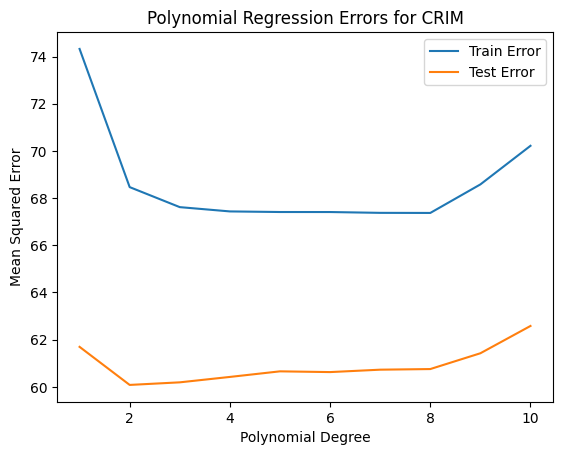

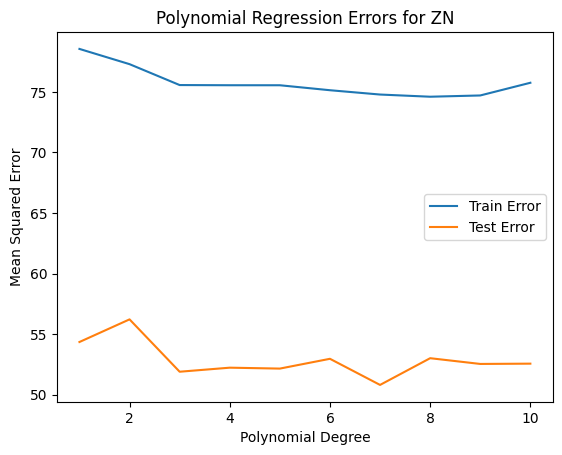

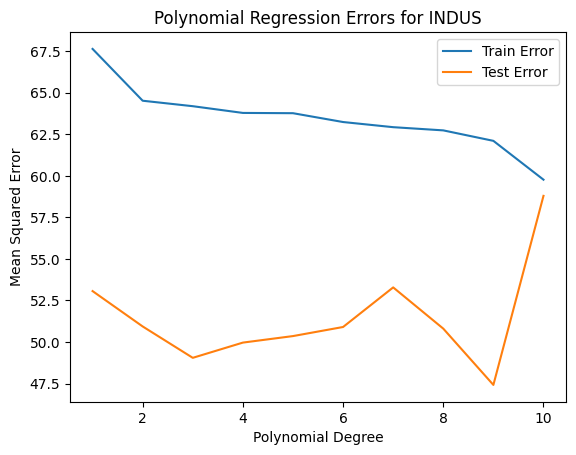

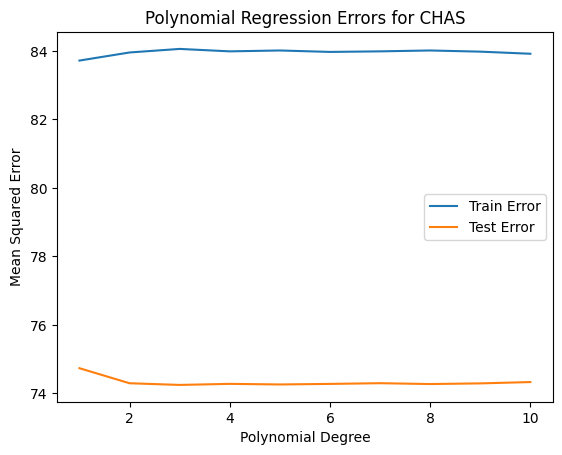

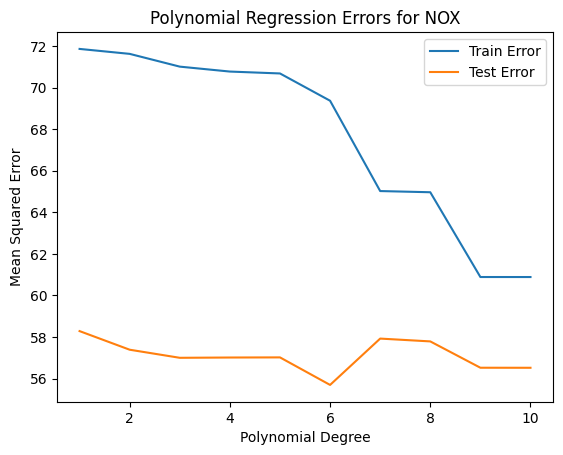

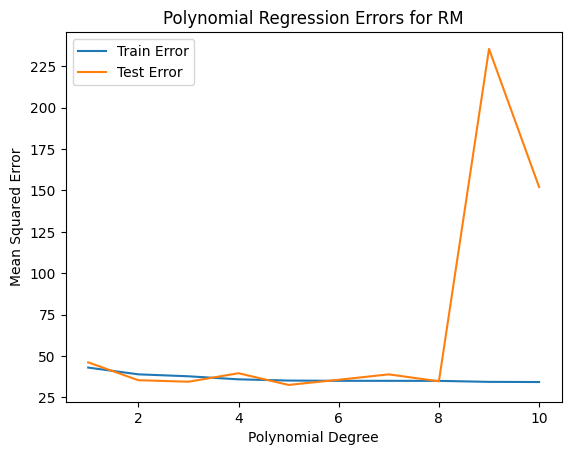

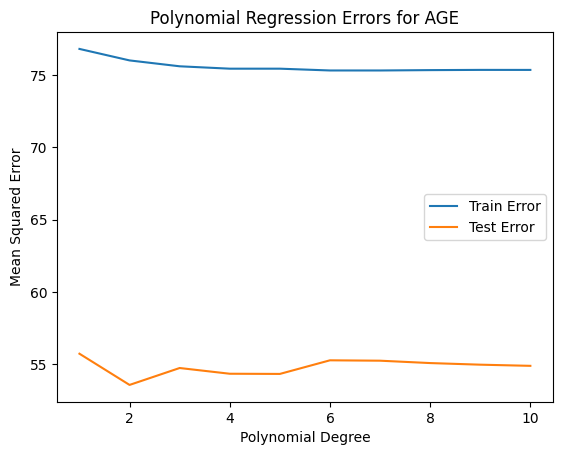

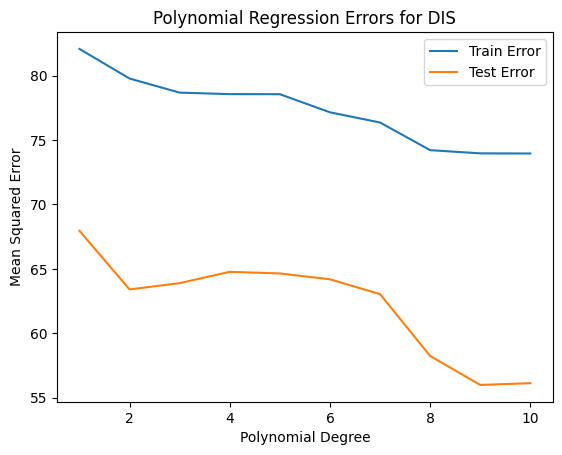

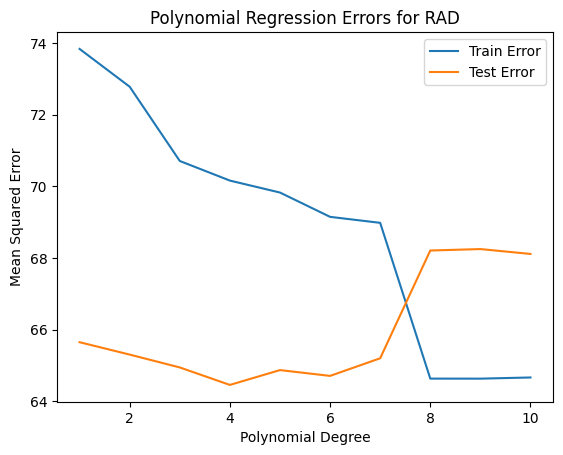

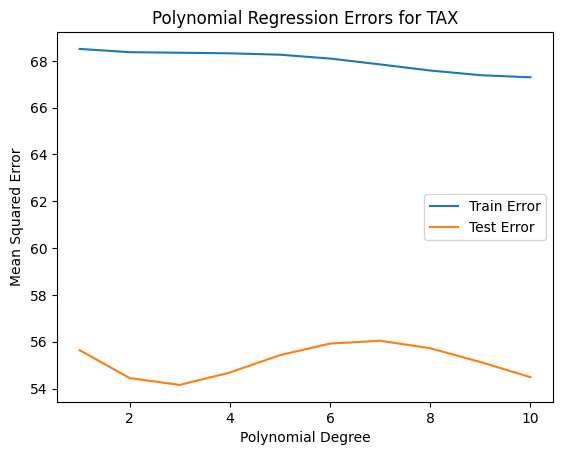

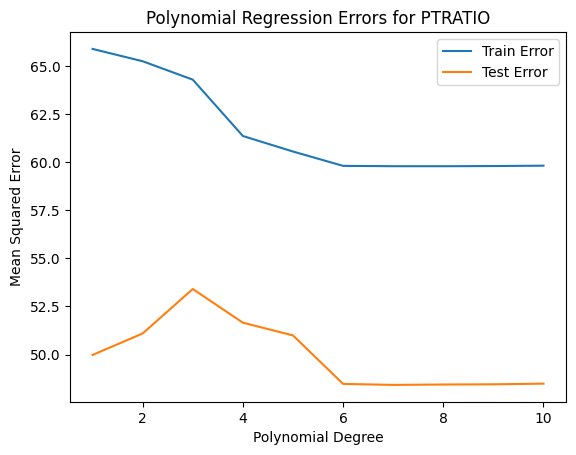

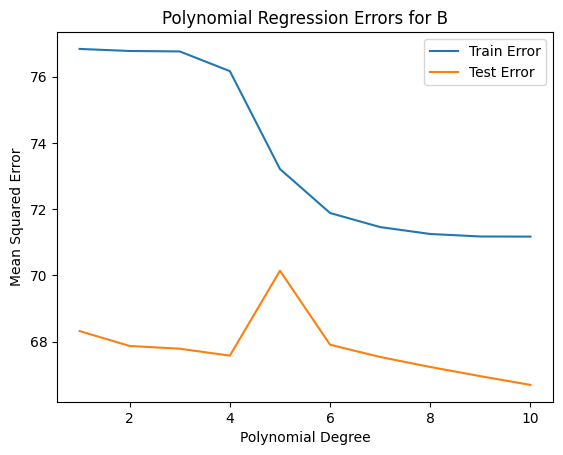

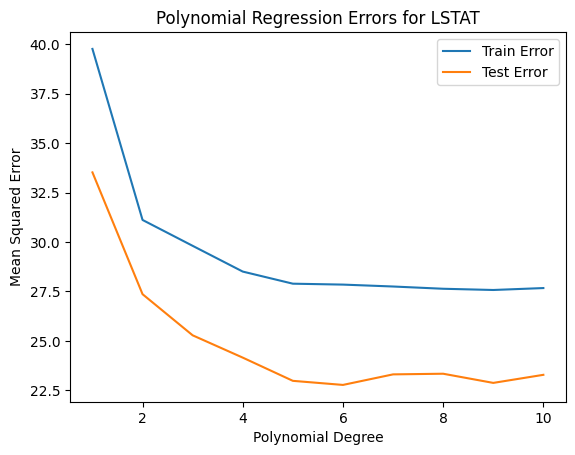

In [4]:
# Repeat the experiment for all features
for feature_name in df.columns[:-1]:  # exclude the target variable
    degrees, train_errors, test_errors = fit_polynomial_regression(df, feature_name)

    # Plot the train and test errors
    plt.plot(degrees, train_errors, label='Train Error')
    plt.plot(degrees, test_errors, label='Test Error')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Polynomial Regression Errors for {feature_name}')
    plt.legend()
    plt.show()